In [1]:
# Copying the First few lines from the other Graph Section

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# Link to Data Used = https://github.com/nytimes/covid-19-data

In [4]:
# Let's read in the US Data
total_us_data = pd.read_csv('NYT-US-Data/us-states-2020-04-23.csv')

In [5]:
# let's give the data a look
total_us_data.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [6]:
# Let's check for nulls
total_us_data.isnull().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [7]:
# Let's check on the different states
total_us_data.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands',
       'American Samoa'], dtype=object)

### Let's Check on and Add Some Data

In [8]:
# Date isn't DateTime Yet
total_us_data.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [9]:
# Fixed it
total_us_data['date'] = pd.to_datetime(total_us_data['date'])

In [10]:
# Took me a few days, but I figured out how to do pct_change with groupby
# This will show the percent change in cases by day
total_us_data['percent_change'] = total_us_data.groupby('state').cases.pct_change()
total_us_data['percent_change'].fillna(0, inplace=True)

In [11]:
# Let's add a difference column
total_us_data['change_in_cases'] = total_us_data.groupby('state')['cases'].diff()

In [12]:
total_us_data[total_us_data['state'] == 'Utah'].tail()

,date,state,fips,cases,deaths,percent_change,change_in_cases
2601,2020-04-18,Utah,49,2942,25,0.045859,129.0
2657,2020-04-19,Utah,49,3071,27,0.043848,129.0
2713,2020-04-20,Utah,49,3213,28,0.046239,142.0
2769,2020-04-21,Utah,49,3301,32,0.027389,88.0
2825,2020-04-22,Utah,49,3451,34,0.045441,150.0


In [13]:
# Looks good
total_us_data.head()

,date,state,fips,cases,deaths,percent_change,change_in_cases
0,2020-01-21,Washington,53,1,0,0.0,NaN
1,2020-01-22,Washington,53,1,0,0.0,0.0
2,2020-01-23,Washington,53,1,0,0.0,0.0
3,2020-01-24,Illinois,17,1,0,0.0,NaN
4,2020-01-24,Washington,53,1,0,0.0,0.0


### Separating the Data by State

In [14]:
# Let's make a funciton to seperate these
def state_info(state):
    data = total_us_data[total_us_data.state == state]
    data.date = pd.to_datetime(data.date)
    data = data.set_index(data.date)
#     data['percent_change'] = data.cases.pct_change()
#     data.percent_change.fillna(0, inplace=True)
    return data.drop(labels='date', axis=1)

In [15]:
# Function Test
state_info('Northern Mariana Islands').head()

C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,state,fips,cases,deaths,percent_change,change_in_cases
date,,,,,,
2020-03-28,Northern Mariana Islands,69,2,0,0.0,NaN
2020-03-29,Northern Mariana Islands,69,2,0,0.0,0.0
2020-03-30,Northern Mariana Islands,69,2,0,0.0,0.0
2020-03-31,Northern Mariana Islands,69,2,0,0.0,0.0
2020-04-01,Northern Mariana Islands,69,6,1,2.0,4.0


In [16]:
# Don't know how to make a function to do this, so here we go
washington_data = state_info(total_us_data.state.unique()[0])
illinois_data = state_info(total_us_data.state.unique()[1])
california_data = state_info(total_us_data.state.unique()[2])
arizona_data = state_info(total_us_data.state.unique()[3])
massachusetts_data = state_info(total_us_data.state.unique()[4])
wisconsin_data = state_info(total_us_data.state.unique()[5])
texas_data = state_info(total_us_data.state.unique()[6])
nebraska_data = state_info(total_us_data.state.unique()[7])
utah_data = state_info(total_us_data.state.unique()[8])
oregon_data = state_info(total_us_data.state.unique()[9])
florida_data = state_info(total_us_data.state.unique()[10])
new_york_data = state_info(total_us_data.state.unique()[11])
rhode_island_data = state_info(total_us_data.state.unique()[12])
georgia_data = state_info(total_us_data.state.unique()[13])
new_hampshire_data = state_info(total_us_data.state.unique()[14])
north_carolina_data = state_info(total_us_data.state.unique()[15])
new_jersey_data = state_info(total_us_data.state.unique()[16])
colorado_data = state_info(total_us_data.state.unique()[17])
maryland_data = state_info(total_us_data.state.unique()[18])
nevada_data = state_info(total_us_data.state.unique()[19])
tennessee_data = state_info(total_us_data.state.unique()[20])
hawaii_data = state_info(total_us_data.state.unique()[21])
indiana_data = state_info(total_us_data.state.unique()[22])
kentucky_data = state_info(total_us_data.state.unique()[23])
minnesota_data = state_info(total_us_data.state.unique()[24])
oklahoma_data = state_info(total_us_data.state.unique()[25])
pennsylvania_data = state_info(total_us_data.state.unique()[26])
south_carolina_data = state_info(total_us_data.state.unique()[27])
dc_data = state_info(total_us_data.state.unique()[28])
kansas_data = state_info(total_us_data.state.unique()[29])
missouri_data = state_info(total_us_data.state.unique()[30])
vermont_data = state_info(total_us_data.state.unique()[31])
virginia_data = state_info(total_us_data.state.unique()[32])
connecticut_data = state_info(total_us_data.state.unique()[33])
iowa_data = state_info(total_us_data.state.unique()[34])
louisiana_data = state_info(total_us_data.state.unique()[35])
ohio_data = state_info(total_us_data.state.unique()[36])
michigan_data = state_info(total_us_data.state.unique()[37])
south_dakota_data = state_info(total_us_data.state.unique()[38])
arkansas_data = state_info(total_us_data.state.unique()[39])
delaware_data = state_info(total_us_data.state.unique()[40])
mississippi_data = state_info(total_us_data.state.unique()[41])
new_mexico_data = state_info(total_us_data.state.unique()[42])
north_dakota_data = state_info(total_us_data.state.unique()[43])
wyoming_data = state_info(total_us_data.state.unique()[44])
alaska_data = state_info(total_us_data.state.unique()[45])
maine_data = state_info(total_us_data.state.unique()[46])
alabama_data = state_info(total_us_data.state.unique()[47])
idaho_data = state_info(total_us_data.state.unique()[48])
montana_data = state_info(total_us_data.state.unique()[49])
puerto_rico_data = state_info(total_us_data.state.unique()[50])
virgin_islands_data = state_info(total_us_data.state.unique()[51])
guam_data = state_info(total_us_data.state.unique()[52])
west_virginia_data = state_info(total_us_data.state.unique()[53])
north_mariana_islands_data = state_info(total_us_data.state.unique()[54])
american_samoa_data = state_info(total_us_data.state.unique()[55])

In [17]:
ohio_data.tail()

,state,fips,cases,deaths,percent_change,change_in_cases
date,,,,,,
2020-04-18,Ohio,39,10222,451,0.122433,1115.0
2020-04-19,Ohio,39,11602,471,0.135003,1380.0
2020-04-20,Ohio,39,12919,509,0.113515,1317.0
2020-04-21,Ohio,39,13725,557,0.062389,806.0
2020-04-22,Ohio,39,14117,610,0.028561,392.0


# Rushing These Out for the Blog Post, But Will Update Them or Make More

### Ohio

C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


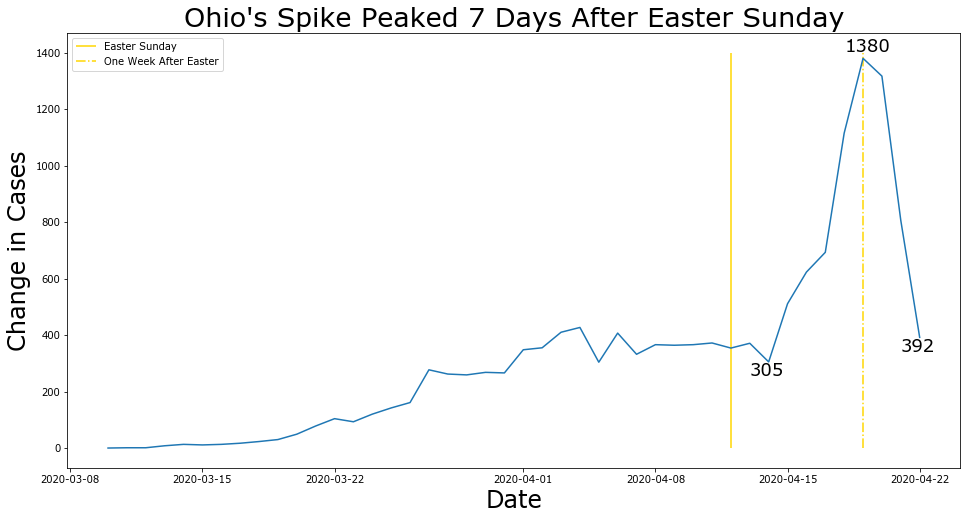

In [18]:
plt.figure(figsize=(16,8))
plt.title("Ohio's Spike Peaked 7 Days After Easter Sunday", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Change in Cases', size=24)

plt.text(x=dt.date(2020, 4, 13), y=ohio_data.change_in_cases[dt.date(2020, 4, 14)]-50, s=f'{int(ohio_data.change_in_cases[dt.date(2020, 4, 14)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 18), y=ohio_data.change_in_cases[dt.date(2020, 4, 19)]+25, s=f'{int(ohio_data.change_in_cases[dt.date(2020, 4, 19)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 21), y=ohio_data.change_in_cases[dt.date(2020, 4, 22)]-50, s=f'{int(ohio_data.change_in_cases[dt.date(2020, 4, 22)])}', fontsize=18)

plt.vlines(x=dt.date(2020, 4, 12), ymin=0, ymax=1400, linestyles='solid', color='gold', label='Easter Sunday')
plt.vlines(x=dt.date(2020, 4, 19), ymin=0, ymax=1400, linestyle='dashdot', color='gold', label='One Week After Easter')

plt.plot(ohio_data.change_in_cases)

plt.legend(loc='upper left');

In [19]:
ohio_data.drop(columns='fips').tail(10)

,state,cases,deaths,percent_change,change_in_cases
date,,,,,
2020-04-13,Ohio,6975,274,0.056178,371.0
2020-04-14,Ohio,7280,324,0.043728,305.0
2020-04-15,Ohio,7791,361,0.070192,511.0
2020-04-16,Ohio,8414,389,0.079964,623.0
2020-04-17,Ohio,9107,418,0.082363,693.0
2020-04-18,Ohio,10222,451,0.122433,1115.0
2020-04-19,Ohio,11602,471,0.135003,1380.0
2020-04-20,Ohio,12919,509,0.113515,1317.0
2020-04-21,Ohio,13725,557,0.062389,806.0


### Iowa

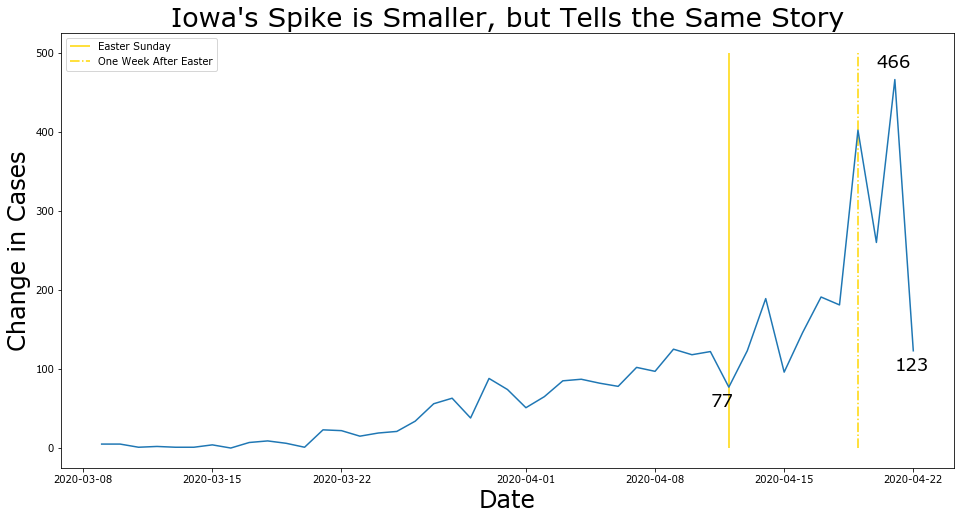

In [20]:
plt.figure(figsize=(16,8))
plt.title("Iowa's Spike is Smaller, but Tells the Same Story", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Change in Cases', size=24)

plt.text(x=dt.date(2020, 4, 11), y=iowa_data.change_in_cases[dt.date(2020, 4, 12)]-25, s=f'{int(iowa_data.change_in_cases[dt.date(2020, 4, 12)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 20), y=iowa_data.change_in_cases[dt.date(2020, 4, 21)]+15, s=f'{int(iowa_data.change_in_cases[dt.date(2020, 4, 21)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 21), y=iowa_data.change_in_cases[dt.date(2020, 4, 22)]-25, s=f'{int(iowa_data.change_in_cases[dt.date(2020, 4, 22)])}', fontsize=18)

plt.vlines(x=dt.date(2020, 4, 12), ymin=0, ymax=500, linestyles='solid', color='gold', label='Easter Sunday')
plt.vlines(x=dt.date(2020, 4, 19), ymin=0, ymax=500, linestyle='dashdot', color='gold', label='One Week After Easter')

plt.plot(iowa_data.change_in_cases)

plt.legend(loc='upper left');

In [21]:
iowa_data.drop(columns='fips').tail(10)

,state,cases,deaths,percent_change,change_in_cases
date,,,,,
2020-04-13,Iowa,1710,44,0.077505,123.0
2020-04-14,Iowa,1899,44,0.110526,189.0
2020-04-15,Iowa,1995,53,0.050553,96.0
2020-04-16,Iowa,2141,60,0.073183,146.0
2020-04-17,Iowa,2332,64,0.089211,191.0
2020-04-18,Iowa,2513,74,0.077616,181.0
2020-04-19,Iowa,2915,75,0.159968,402.0
2020-04-20,Iowa,3175,79,0.089194,260.0
2020-04-21,Iowa,3641,83,0.146772,466.0


### Mississippi

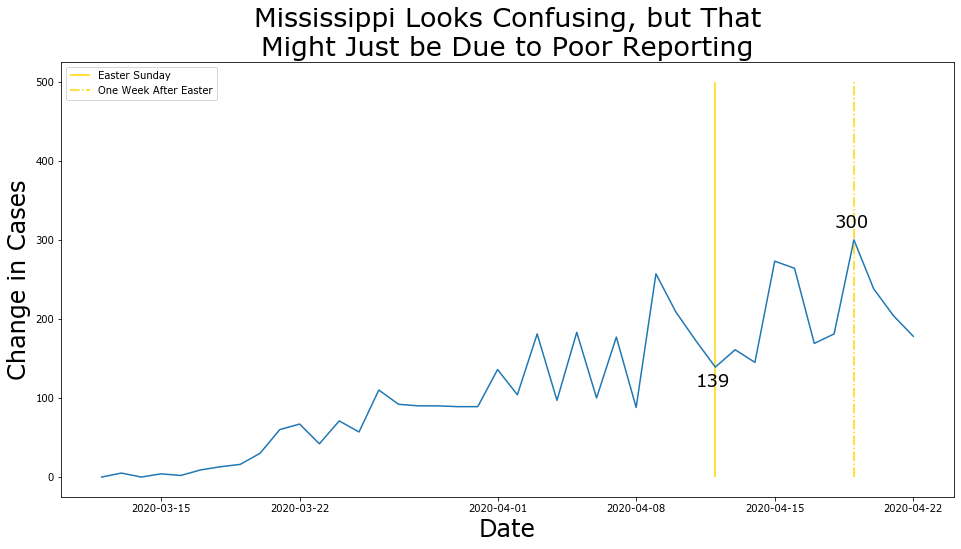

In [22]:
plt.figure(figsize=(16,8))
plt.title("Mississippi Looks Confusing, but That\nMight Just be Due to Poor Reporting", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Change in Cases', size=24)

plt.text(x=dt.date(2020, 4, 11), y=mississippi_data.change_in_cases[dt.date(2020, 4, 12)]-25, s=f'{int(mississippi_data.change_in_cases[dt.date(2020, 4, 12)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 18), y=mississippi_data.change_in_cases[dt.date(2020, 4, 19)]+15, s=f'{int(mississippi_data.change_in_cases[dt.date(2020, 4, 19)])}', fontsize=18)

plt.vlines(x=dt.date(2020, 4, 12), ymin=0, ymax=500, linestyles='solid', color='gold', label='Easter Sunday')
plt.vlines(x=dt.date(2020, 4, 19), ymin=0, ymax=500, linestyle='dashdot', color='gold', label='One Week After Easter')

plt.plot(mississippi_data.change_in_cases)

plt.legend(loc='upper left');

In [23]:
mississippi_data.drop(columns='fips').tail(10)

,state,cases,deaths,percent_change,change_in_cases
date,,,,,
2020-04-13,Mississippi,2942,98,0.057893,161.0
2020-04-14,Mississippi,3087,111,0.049286,145.0
2020-04-15,Mississippi,3360,122,0.088435,273.0
2020-04-16,Mississippi,3624,129,0.078571,264.0
2020-04-17,Mississippi,3793,140,0.046634,169.0
2020-04-18,Mississippi,3974,152,0.047719,181.0
2020-04-19,Mississippi,4274,159,0.075491,300.0
2020-04-20,Mississippi,4512,169,0.055686,238.0
2020-04-21,Mississippi,4716,183,0.045213,204.0


### Alabama

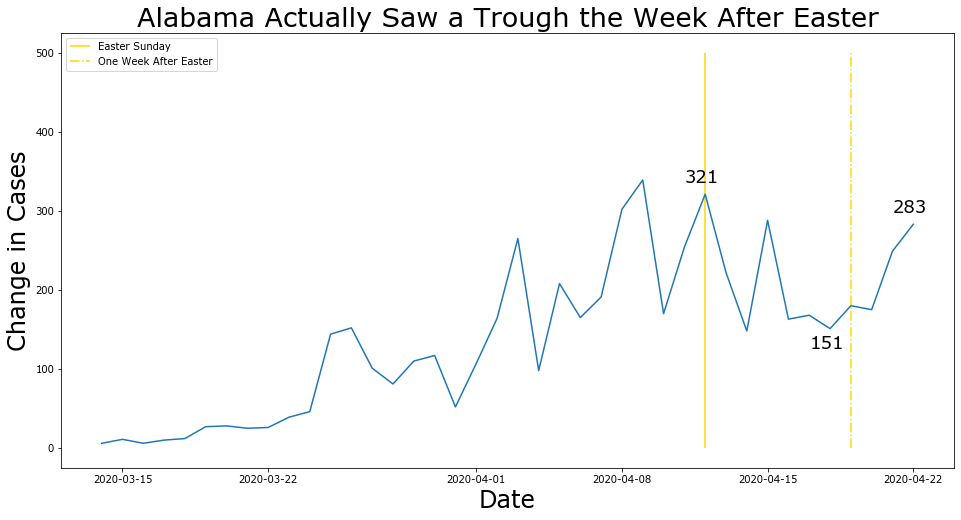

In [24]:
plt.figure(figsize=(16,8))
plt.title("Alabama Actually Saw a Trough the Week After Easter", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Change in Cases', size=24)

plt.text(x=dt.date(2020, 4, 11), y=alabama_data.change_in_cases[dt.date(2020, 4, 12)]+15, s=f'{int(alabama_data.change_in_cases[dt.date(2020, 4, 12)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 17), y=alabama_data.change_in_cases[dt.date(2020, 4, 18)]-25, s=f'{int(alabama_data.change_in_cases[dt.date(2020, 4, 18)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 21), y=alabama_data.change_in_cases[dt.date(2020, 4, 22)]+15, s=f'{int(alabama_data.change_in_cases[dt.date(2020, 4, 22)])}', fontsize=18)

plt.vlines(x=dt.date(2020, 4, 12), ymin=0, ymax=500, linestyles='solid', color='gold', label='Easter Sunday')
plt.vlines(x=dt.date(2020, 4, 19), ymin=0, ymax=500, linestyle='dashdot', color='gold', label='One Week After Easter')

plt.plot(alabama_data.change_in_cases)

plt.legend(loc='upper left');

In [25]:
alabama_data.drop(columns='fips').tail(10)

,state,cases,deaths,percent_change,change_in_cases
date,,,,,
2020-04-13,Alabama,3805,104,0.061959,222.0
2020-04-14,Alabama,3953,114,0.038896,148.0
2020-04-15,Alabama,4241,123,0.072856,288.0
2020-04-16,Alabama,4404,137,0.038434,163.0
2020-04-17,Alabama,4572,151,0.038147,168.0
2020-04-18,Alabama,4723,147,0.033027,151.0
2020-04-19,Alabama,4903,160,0.038111,180.0
2020-04-20,Alabama,5078,164,0.035692,175.0
2020-04-21,Alabama,5327,186,0.049035,249.0


### Tennessee

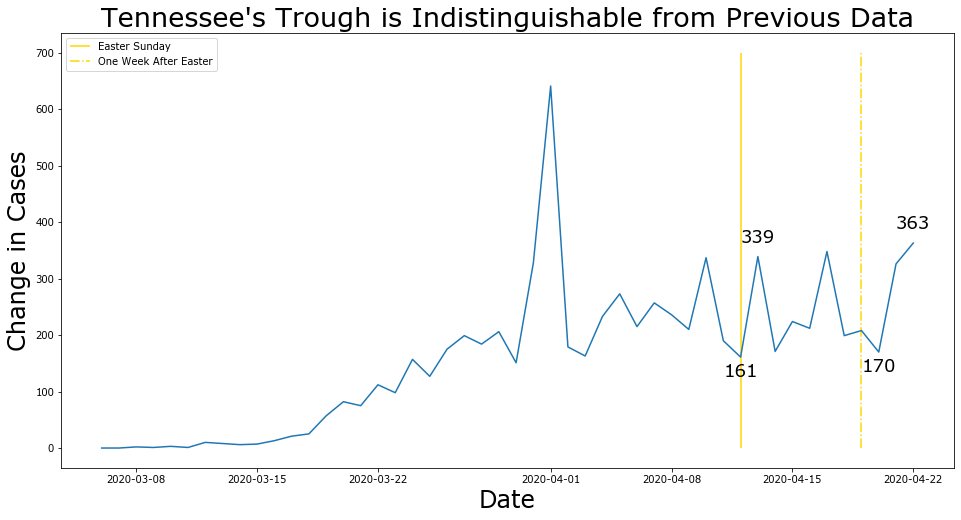

In [26]:
plt.figure(figsize=(16,8))
plt.title("Tennessee's Trough is Indistinguishable from Previous Data", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Change in Cases', size=24)

plt.text(x=dt.date(2020, 4, 11), y=tennessee_data.change_in_cases[dt.date(2020, 4, 12)]-35, s=f'{int(tennessee_data.change_in_cases[dt.date(2020, 4, 12)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 12), y=tennessee_data.change_in_cases[dt.date(2020, 4, 13)]+25, s=f'{int(tennessee_data.change_in_cases[dt.date(2020, 4, 13)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 19), y=tennessee_data.change_in_cases[dt.date(2020, 4, 20)]-35, s=f'{int(tennessee_data.change_in_cases[dt.date(2020, 4, 20)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 21), y=tennessee_data.change_in_cases[dt.date(2020, 4, 22)]+25, s=f'{int(tennessee_data.change_in_cases[dt.date(2020, 4, 22)])}', fontsize=18)

plt.vlines(x=dt.date(2020, 4, 12), ymin=0, ymax=700, linestyles='solid', color='gold', label='Easter Sunday')
plt.vlines(x=dt.date(2020, 4, 19), ymin=0, ymax=700, linestyle='dashdot', color='gold', label='One Week After Easter')

plt.plot(tennessee_data.change_in_cases)

plt.legend(loc='upper left');

In [27]:
tennessee_data.drop(columns='fips').tail(10)

,state,cases,deaths,percent_change,change_in_cases
date,,,,,
2020-04-13,Tennessee,5483,114,0.065902,339.0
2020-04-14,Tennessee,5654,123,0.031187,171.0
2020-04-15,Tennessee,5878,137,0.039618,224.0
2020-04-16,Tennessee,6090,144,0.036067,212.0
2020-04-17,Tennessee,6438,150,0.057143,348.0
2020-04-18,Tennessee,6637,152,0.030910,199.0
2020-04-19,Tennessee,6845,156,0.031339,208.0
2020-04-20,Tennessee,7015,162,0.024836,170.0
2020-04-21,Tennessee,7341,167,0.046472,326.0


### Louisiana

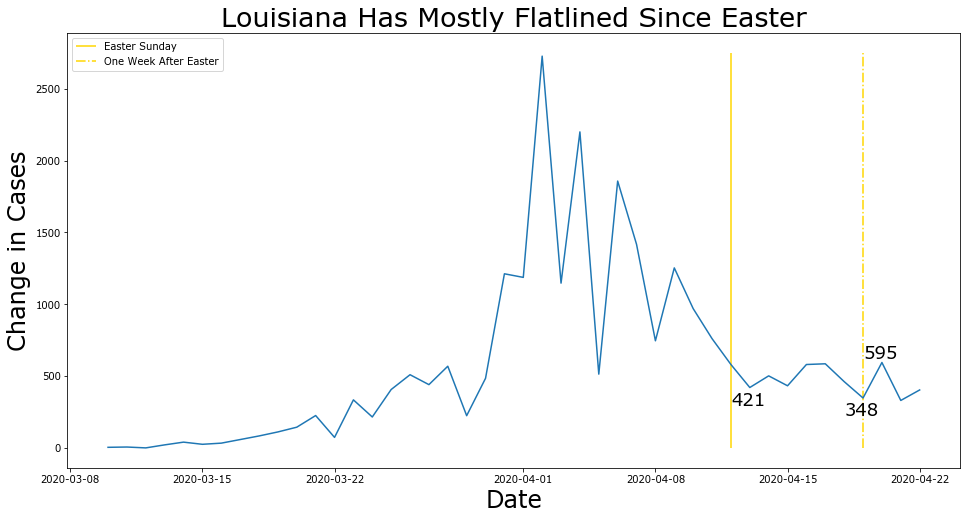

In [28]:
plt.figure(figsize=(16,8))
plt.title("Louisiana Has Mostly Flatlined Since Easter", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Change in Cases', size=24)

plt.text(x=dt.date(2020, 4, 12), y=louisiana_data.change_in_cases[dt.date(2020, 4, 13)]-125, s=f'{int(louisiana_data.change_in_cases[dt.date(2020, 4, 13)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 18), y=louisiana_data.change_in_cases[dt.date(2020, 4, 19)]-125, s=f'{int(louisiana_data.change_in_cases[dt.date(2020, 4, 19)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 19), y=louisiana_data.change_in_cases[dt.date(2020, 4, 20)]+25, s=f'{int(louisiana_data.change_in_cases[dt.date(2020, 4, 20)])}', fontsize=18)

plt.vlines(x=dt.date(2020, 4, 12), ymin=0, ymax=2750, linestyles='solid', color='gold', label='Easter Sunday')
plt.vlines(x=dt.date(2020, 4, 19), ymin=0, ymax=2750, linestyle='dashdot', color='gold', label='One Week After Easter')

plt.plot(louisiana_data.change_in_cases)

plt.legend(loc='upper left');

In [29]:
louisiana_data.drop(columns='fips').tail(10)

,state,cases,deaths,percent_change,change_in_cases
date,,,,,
2020-04-13,Louisiana,21016,884,0.020442,421.0
2020-04-14,Louisiana,21518,1013,0.023887,502.0
2020-04-15,Louisiana,21951,1103,0.020123,433.0
2020-04-16,Louisiana,22532,1156,0.026468,581.0
2020-04-17,Louisiana,23118,1213,0.026007,586.0
2020-04-18,Louisiana,23580,1267,0.019984,462.0
2020-04-19,Louisiana,23928,1296,0.014758,348.0
2020-04-20,Louisiana,24523,1328,0.024866,595.0
2020-04-21,Louisiana,24854,1405,0.013498,331.0


## US Data

In [30]:
# let's just load this in real quick
us_data = pd.read_csv('NYT-US-Data/us-2020-04-23.csv')
us_data.index = pd.to_datetime(us_data.date)
us_data = us_data.drop(columns='date')

In [31]:
# And we'll add these columns too
us_data['change_in_cases'] = us_data.cases.diff()
us_data['percent_change'] = us_data.cases.pct_change()

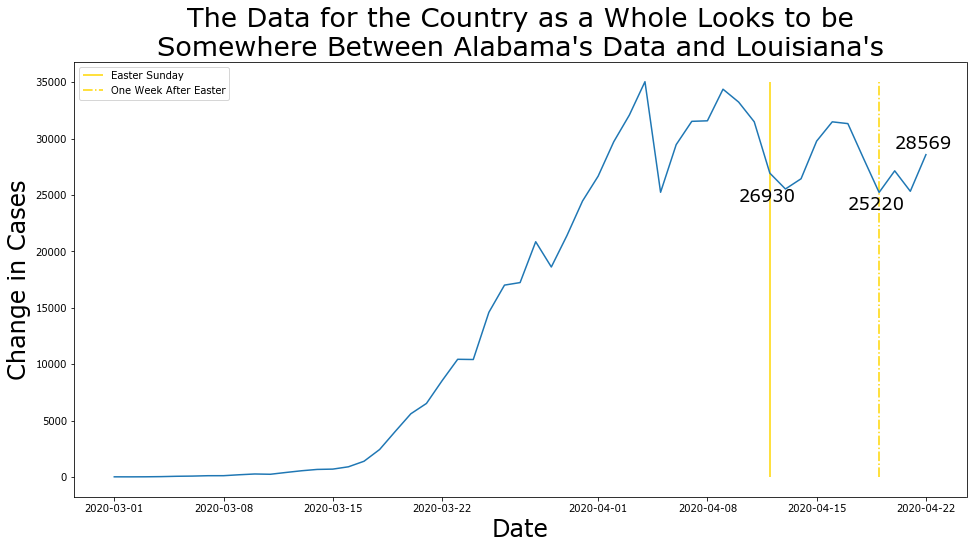

In [32]:
plt.figure(figsize=(16,8))
plt.title("The Data for the Country as a Whole Looks to be\nSomewhere Between Alabama's Data and Louisiana's", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Change in Cases', size=24)

plt.text(x=dt.date(2020, 4, 10), y=us_data.change_in_cases[dt.date(2020, 4, 12)]-2500, s=f'{int(us_data.change_in_cases[dt.date(2020, 4, 12)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 17), y=us_data.change_in_cases[dt.date(2020, 4, 19)]-1500, s=f'{int(us_data.change_in_cases[dt.date(2020, 4, 19)])}', fontsize=18)
plt.text(x=dt.date(2020, 4, 20), y=us_data.change_in_cases[dt.date(2020, 4, 22)]+500, s=f'{int(us_data.change_in_cases[dt.date(2020, 4, 22)])}', fontsize=18)

plt.vlines(x=dt.date(2020, 4, 12), ymin=0, ymax=35_000, linestyles='solid', color='gold', label='Easter Sunday')
plt.vlines(x=dt.date(2020, 4, 19), ymin=0, ymax=35_000, linestyle='dashdot', color='gold', label='One Week After Easter')

plt.plot(us_data.change_in_cases[dt.date(2020, 3, 1):])

plt.legend(loc='upper left');

In [33]:
us_data[dt.date(2020, 4, 1):]

,cases,deaths,change_in_cases,percent_change
date,,,,
2020-04-01,214711,4841,26662.0,0.141782
2020-04-02,244423,6232,29712.0,0.138381
2020-04-03,276501,7121,32078.0,0.131240
2020-04-04,311536,8499,35035.0,0.126708
2020-04-05,336771,9654,25235.0,0.081002
2020-04-06,366227,10958,29456.0,0.087466
2020-04-07,397748,12957,31521.0,0.086070
2020-04-08,429316,14803,31568.0,0.079367
2020-04-09,463684,16673,34368.0,0.080053
